# Mini-Lab 1 

Expected value and standard deviation of a coin-flip game

#### Submission

Please simply show me this work in class, through Zoom, or convert the notebook to a PDF and send it via email.

This is one of the in-class activities mentioned on the syllabus. The lab will be started in-class, but can be completed after class too.

# Expected value and standard deviation of a coin-flip game

### Setup

You are playing a coin-flip game. If the coin lands heads, you win 2 dollars. If the coin lands tails, you lose 1 dolar. Assume the coin is fair (probability 0.5 each).

### Your task

Fill in the missing parts below that simulate the game and quantify various statistical properties of your winnings. Missing parts are labelled with "TODO"

## Part 1: simple statisitcs

In [36]:
import numpy as np

# number of coin flips
n_flips = 1000

# for reproducibility
np.random.seed(23)

# simulate coin flips: 1 for heads, 0 for tails
flips = np.random.randint(0, 2, size=n_flips)

# count the number of heads and tails
n_heads = np.sum(flips == 1)
n_tails = np.sum(flips == 0)

print("Heads:", n_heads)
print("Tails:", n_tails)

# map outcomes to winnings: +2 for heads, -1 for tails
# TODO: write a Python function that does this.
def mapping(flips):
    winnings = []
    for flip in flips:
        if(flip == 1):
            winnings.append(2)
        else:
            winnings.append(-1)
    return winnings            

# compute sample mean and std dev
mean_winnings = np.mean(mapping(flips)) # TODO
std_winnings =  np.std(mapping(flips), ddof = 1) # TODO

print("Sample mean:", mean_winnings)
print("Sample std dev:", std_winnings)

Heads: 506
Tails: 494
Sample mean: 0.518
Sample std dev: 1.5006425050384016


## Part 2: law of large numbers

Now write code that runs the simulation for 10000 flips

Make two figures:

1. plot cumulative winnings vs number of flips
2. plot average winnings per flip vs number of flips. On the same plot, compare this number to the expected value of 0.5

You should find that the empirically measured average winnings converges to the expected value of 0.5. And the convergence is quantified by "standard deviation"/sqrt(flips). This is somtimes called the law of large numbers

Heads: 5037
Tails: 4963
Cumulative winnings: [   2    1    0 ... 5107 5109 5111]
Average winnings: [2.         0.5        0.         ... 0.51080216 0.5109511  0.5111    ]


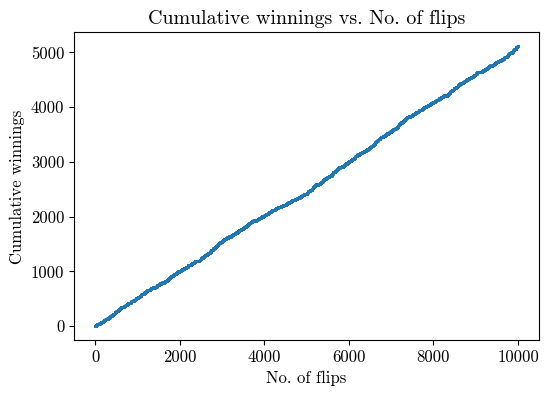

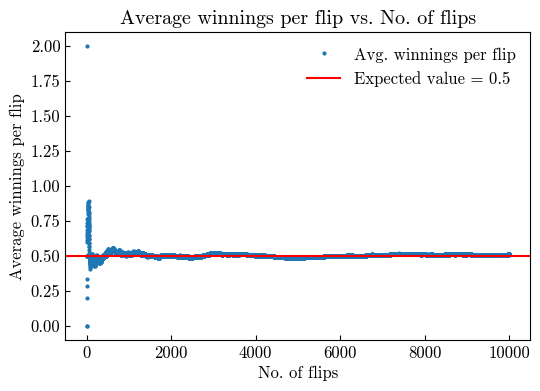

In [35]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# number of coin flips
n_flips = 10000

# for reproducibility
np.random.seed(23)

# simulate coin flips: 1 for heads, 0 for tails
flips = np.random.randint(0, 2, size=n_flips)

# count the number of heads and tails
n_heads = np.sum(flips == 1)
n_tails = np.sum(flips == 0)

print("Heads:", n_heads)
print("Tails:", n_tails)

# cumulative winnings
cumul_winnings = np.cumsum(mapping(flips))
print("Cumulative winnings:", cumul_winnings)

# plotting parameters
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'cmr10'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False

# plotting cunulative winnings vs no. of flips
plt.figure(figsize=(6, 4))
plt.plot(cumul_winnings, 'o', markersize=1)
plt.xlabel('No. of flips')
plt.ylabel('Cumulative winnings')
plt.title('Cumulative winnings vs. No. of flips')

# average winnings per flip
avg_winnings = cumul_winnings / np.arange(1, n_flips + 1)
print("Average winnings:", avg_winnings)

expected_value = 0.5

# plotting cunulative winnings vs no. of flips
plt.figure(figsize=(6, 4))
plt.plot(avg_winnings, 'o', markersize=2, label='Avg. winnings per flip')
plt.axhline(expected_value, color='red', label='Expected value = 0.5')
plt.xlabel('No. of flips')
plt.ylabel('Average winnings per flip')
plt.title('Average winnings per flip vs. No. of flips')
plt.legend(frameon=False)
plt.tick_params(axis="both", which="both", direction="in")
